# Data Analysis with Indian Premier League(IPL)

### Importing Packages

In [10]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

### Creating the connection to DataBase

In [11]:
conn = sqlite3.connect('C:/Users/Dell/Desktop/Data_Analysis/database.sqlite')


### Exploring all the tables we have

In [39]:
All_tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table'""", conn)
All_tables

,type,name,tbl_name,rootpage,sql
0,table,Player,Player,2,CREATE TABLE [Player] (\n\t[Player_Id]\tintege...
1,table,Extra_Runs,Extra_Runs,3,CREATE TABLE [Extra_Runs] (\n\t[Match_Id]\tint...
2,table,Batsman_Scored,Batsman_Scored,7,CREATE TABLE [Batsman_Scored] (\n\t[Match_Id]\...
3,table,Batting_Style,Batting_Style,10,CREATE TABLE [Batting_Style] (\n\t[Batting_Id]...
4,table,Bowling_Style,Bowling_Style,11,CREATE TABLE [Bowling_Style] (\n\t[Bowling_Id]...
5,table,Country,Country,12,CREATE TABLE [Country] (\n\t[Country_Id]\tinte...
6,table,Season,Season,14,CREATE TABLE [Season] (\n\t[Season_Id]\tintege...
7,table,City,City,15,CREATE TABLE [City] (\n\t[City_Id]\tinteger NO...
8,table,Outcome,Outcome,16,CREATE TABLE [Outcome] (\n\t[Outcome_Id]\tinte...
9,table,Win_By,Win_By,17,CREATE TABLE [Win_By] (\n\t[Win_Id]\tinteger N...


### Lets see metrics that provides brief information about IPL

#### We will answer  Total no of matches played, Total extra runs given, Total no of runs scored, Total no of wickets taken and Total no of boundaries in IPL

In [53]:
overall_metric = pd.read_sql("""SELECT 'Matches' As Dimension , COUNT(*) As 'Measure' FROM Match
                   
                   UNION ALL
                   
                   SELECT 'Extra_Runs' As Dimension , SUM(Extra_Runs.Extra_Runs) As 'Measure' FROM Extra_Runs
                   
                   UNION ALL
                   
                   SELECT 'Batsman_runs' As Dimension , SUM(B.Runs_Scored) As 'Value' FROM Batsman_Scored B
            
                   UNION ALL
                   
                   SELECT 'Wickets' As Dimension , COUNT(*) As 'Measure'  FROM Wicket_Taken
            
                   UNION ALL

                   SELECT 'Sixes' As Dimension , COUNT(*) As 'Measure' FROM Batsman_Scored 
                   WHERE Batsman_Scored.Runs_Scored = 6
                   
                   UNION ALL
                    
                   SELECT 'Fours' As Dimension , COUNT(*) As 'Measure' FROM Batsman_Scored
                   WHERE Batsman_Scored.Runs_Scored = 4""", conn )
overall_metric

,Dimension,Measure
0,Matches,577
1,Extra_Runs,9514
2,Batsman_runs,165961
3,Wickets,6727
4,Sixes,5814
5,Fours,15414


### List of teams competing in IPL

In [44]:
All_teams = pd.read_sql("""SELECT *
                        FROM Team""", conn)
All_teams

,Team_Id,Team_Name
0,1,Kolkata Knight Riders
1,2,Royal Challengers Bangalore
2,3,Chennai Super Kings
3,4,Kings XI Punjab
4,5,Rajasthan Royals
5,6,Delhi Daredevils
6,7,Mumbai Indians
7,8,Deccan Chargers
8,9,Kochi Tuskers Kerala
9,10,Pune Warriors


### Lets find Teams with highest Wins in IPL

In [43]:
Winners = pd.read_sql("""SELECT Team_name, count(Match_Winner) As 'No_Of_Wins'
                         FROM Team T 
                                 inner join Match M
                                            ON M.Match_Winner=T.Team_id
                         GROUP BY T.Team_Name
                         ORDER BY No_Of_Wins DESC""", conn)
Winners

,Team_Name,No_Of_Wins
0,Mumbai Indians,80
1,Chennai Super Kings,79
2,Royal Challengers Bangalore,70
3,Kolkata Knight Riders,68
4,Kings XI Punjab,63
5,Rajasthan Royals,63
6,Delhi Daredevils,56
7,Sunrisers Hyderabad,34
8,Deccan Chargers,29
9,Pune Warriors,12


### Season wise boundaries

In [59]:
season_wise_boundaries = pd.read_sql("""SELECT season.season_year, 
                                        Sum (CASE 
                                                  WHEN batsman_scored.runs_scored = 4 THEN 1 
                                                  ELSE 0 
                                            END) AS 'Fours', 
                                        Sum (CASE 
                                                  WHEN batsman_scored.runs_scored = 6 THEN 1 
                                                  ELSE 0 
                                            END) AS 'Sixes' 
                                            
                                        FROM   match 
                                                INNER JOIN season 
                                                        ON match.season_id = season.season_id 
                                                                INNER JOIN batsman_scored 
                                                                       ON batsman_scored.match_id = match.match_id 
                                       GROUP  BY season.season_year """,conn )

season_wise_boundaries

,Season_Year,Fours,Sixes
0,2008,1702,622
1,2009,1320,508
2,2010,1709,587
3,2011,1913,639
4,2012,1911,731
5,2013,2053,681
6,2014,1563,715
7,2015,1611,692
8,2016,1632,639


### Players with highest no of SIXES in Indian Premier League

In [9]:
sixes_by_players = pd.read_sql("""SELECT C.Player_Name ,COUNT(*) As 'Sixes'
                                   FROM Ball_by_Ball A
                       
                                           INNER JOIN Batsman_Scored B 
                       
                                                   ON A.Match_Id || A.Over_Id || A.Ball_Id || A.Innings_No = B.Match_Id || 
                                                                                    B.Over_Id || B.Ball_Id || B.Innings_No
                       
                                                               INNER JOIN Player C
                       
                                                                           ON A.Striker = C.Player_Id
                       
                                   WHERE B.Runs_Scored = 6

                                   GROUP BY C.Player_Name
                                   ORDER BY Sixes DESC
                                   LIMIT 10""",conn)
sixes_by_players

,Player_Name,Sixes
0,CH Gayle,252
1,RG Sharma,164
2,SK Raina,161
3,V Kohli,148
4,YK Pathan,143
5,AB de Villiers,142
6,MS Dhoni,140
7,DA Warner,134
8,Yuvraj Singh,133
9,KA Pollard,125


### Players with most FOURS in Indian Premier League

In [51]:
fours_by_players = pd.read_sql("""SELECT C.Player_Name ,COUNT(*) As 'Fours'
                                  FROM Ball_by_Ball A
                       
                                             INNER JOIN Batsman_Scored B 
                       
                                                   ON A.Match_Id || A.Over_Id || A.Ball_Id || A.Innings_No = B.Match_Id || 
                                                                                    B.Over_Id || B.Ball_Id || B.Innings_No
                       
                                                                   INNER JOIN Player C
                       
                                                                               ON A.Striker = C.Player_Id
                       
                                   WHERE B.Runs_Scored = 4

                                   GROUP BY C.Player_Name
                                   ORDER BY Fours DESC
                                   LIMIT 10""",conn)

fours_by_players

,Player_Name,Fours
0,G Gambhir,422
1,SK Raina,360
2,V Kohli,360
3,S Dhawan,348
4,RV Uthappa,341
5,DA Warner,338
6,V Sehwag,334
7,RG Sharma,323
8,SR Tendulkar,295
9,AM Rahane,285


### Players with Highest No of Wickets taken in Indian Premier League

In [14]:
wicket_by_players = pd.read_sql("""SELECT C.Player_Name ,COUNT(*) As 'Wickets'
                                   FROM Ball_by_Ball A
                       
                                       INNER JOIN wicket_taken W
                                                   ON A.Match_Id || A.Over_Id || A.Ball_Id || A.Innings_No = W.Match_Id || 
                                                                                   W.Over_Id || W.Ball_Id || W.Innings_No
                                                               
                                                               INNER JOIN Player C
                                                                        ON A.Bowler = C.Player_Id
                                                                        
                                    GROUP BY C.Player_Name
                                    ORDER BY Wickets DESC""",conn)
wicket_by_players.head(10)

,Player_Name,Wickets
0,SL Malinga,159
1,DJ Bravo,137
2,A Mishra,132
3,Harbhajan Singh,128
4,PP Chawla,127
5,R Vinay Kumar,123
6,A Nehra,111
7,R Ashwin,110
8,Z Khan,107
9,DW Steyn,100


### Players who has taken most catches in Indian Premier League

In [65]:
catches_by_players = pd.read_sql("""SELECT Player.Player_Name , COUNT(*) AS 'Catches'
                                   FROM Wicket_Taken
                                            INNER JOIN Out_Type
                                                    ON Wicket_Taken.Kind_Out = Out_Type.Out_Id
                                                            INNER JOIN Player
                                                                    ON Player.Player_Id = Wicket_Taken.Fielders
                                    WHERE Out_Type.Out_Name = 'caught'
                                    GROUP BY Player.Player_Name
                                    ORDER BY Catches DESC""",conn)
catches_by_players.head(10)

,Player_Name,Catches
0,KD Karthik,80
1,SK Raina,79
2,AB de Villiers,77
3,MS Dhoni,66
4,RV Uthappa,66
5,RG Sharma,60
6,NV Ojha,59
7,V Kohli,55
8,PA Patel,54
9,DJ Bravo,52


### Highest Recepients of "Man of the match" award 

In [63]:
Man_Of_The_Match = pd.read_sql("""SELECT Player_name, count(*) As 'Man_of_the_Match'
                                  FROM Player P 
                                            inner join Match M
                                                    ON P.Player_id=M.Man_of_the_Match
                         GROUP BY P.Player_Name
                         ORDER BY Man_of_the_Match DESC 
                         LIMIT 10""", conn)
Man_Of_The_Match

,Player_Name,Man_of_the_Match
0,CH Gayle,17
1,YK Pathan,16
2,AB de Villiers,15
3,DA Warner,14
4,RG Sharma,13
5,SK Raina,13
6,AM Rahane,12
7,G Gambhir,12
8,MEK Hussey,12
9,MS Dhoni,12


### Most matches captained by players in Indian Premier League

<BarContainer object of 5 artists>

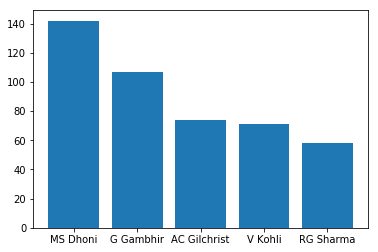

In [42]:
matches_captained = pd.read_sql("""SELECT C.Player_Name , COUNT(*) As 'Matches_captained'
                                   FROM Player_Match A 
                                   INNER JOIN Rolee B
                                   
                                    ON A.Role_Id = B.Role_Id
                                    
                                    INNER JOIN Player C
                                    
                                    ON A.Player_Id = C.Player_Id
                                    
                                    WHERE A.Role_Id = 1 OR A.Role_Id = 4
                                    GROUP BY C.Player_Name
                                    ORDER BY Matches_captained DESC
                                    LIMIT 5""",conn )

labels = matches_captained["Player_Name"]
y = matches_captained["Matches_captained"]

plt.bar(labels,y)